# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Anang Ridwan Syah
- **Email:** anangridwan795@gmail.com
- **ID Dicoding:** anangrdwnsyh

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda berubah sepanjang tahun?
- Apa dampak cuaca terhadap penggunaan layanan penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
#Input file day.csv
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Input file hour.csv
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assessing Data untuk day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Data pada day_df yang formatnya belum sesuai adalah dteday, seharusnya Dtype nya adalah datetime

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data day_df tidak terdapat missing values

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Data day_df tidak terdapat jumlah duplikasi

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Data day_df tidak terdapat outliers

#### Assessing Data untuk hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Data pada hour_df yang formatnya belum sesuai adalah dteday, seharusnya Dtype nya adalah datetime

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data hour_df tidak terdapat missing values

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Data hour_df tidak terdapat duplikasi

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Data hour_df tidak terdapat outliers

### Cleaning Data

In [12]:
drop_col = ['instant']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
drop_col = ['instant']

for i in hour_df.columns:
  if i in drop_col:
    hour_df.drop(labels=i, axis=1, inplace=True)

hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
# Mengubah angka menjadi keterangan
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [15]:
# Mengubah angka menjadi keterangan
hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [16]:
# Mengubah tipe data ke datetime
day_df['dteday'] = pd.to_datetime(day_df.dteday)

In [17]:
# Mengubah tipe data ke datetime
hour_df['dteday'] = pd.to_datetime(hour_df.dteday)

In [18]:
# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

In [20]:
# Mengubaha tipe data ke categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: category(7), dateti

## Exploratory Data Analysis (EDA)

**Kita akan menggunakan dataset day_df dan hour_df untuk menjawab pertanyaan bisnis sebelumnya yaitu:**

1. Bagaimana pola penyewaan sepeda berubah sepanjang tahun?


*   Untuk menjawab pertanyaan ini, kita dapat menganalisis tren harian penyewaan sepeda berdasarkan data tahun yang termasuk dalam dataset.
*   Kita dapat mengelompokkan data berdasarkan bulan atau musim untuk melihat bagaimana jumlah penyewaan sepeda bervariasi sepanjang tahun.
*   Selain itu, kita juga dapat mengeksplorasi pola harian penyewaan sepeda selama minggu, apakah ada perbedaan yang signifikan antara hari kerja dan akhir pekan.


2. Apa dampak cuaca terhadap penggunaan layanan penyewaan sepeda?


*   Untuk menjawab pertanyaan ini, kita perlu mempertimbangkan kolom-kolom yang terkait dengan cuaca dalam dataset, seperti suhu, kelembaban, dan kondisi cuaca.
*   Kita dapat menganalisis bagaimana faktor-faktor cuaca ini mempengaruhi jumlah penyewaan sepeda harian.





### Explore day_df

In [22]:
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,1.0,Aug,0.0,Mon,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [23]:
#Kelompokkan penyewa berdasarkan bulan
day_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
       max   min         mean     sum
mnth                                 
Apr   7460   795  4484.900000  269094
Aug   7865  1115  5664.419355  351194
Dec   6606   441  3403.806452  211036
Feb   5062  1005  2655.298246  151352
Jan   4521   431  2176.338710  134933
Jul   8173  3285  5563.677419  344948
Jun   8120  3767  5772.366667  346342
Mar   8362   605  3692.258065  228920
May   8294  2633  5349.774194  331686
Nov   6852  1495  4247.183333  254831
Oct   8156    22  5199.225806  322352
Sep   8714  1842  5766.516667  345991

In [24]:
#Kelompokkan penyewa berdasarkan workingday
day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

In [25]:
#Kelompokkan penyewa berdasarkan weekday
day_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
})

cnt                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

In [26]:
#Kelompokkan penyewa berdasarkan holiday
day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [27]:
#Kelompokkan penyewa berdasarkan keadaan cuaca
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

In [28]:
#Kelompokkan penyewa berdasarkan season
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

In [29]:
#Kelompokkan temp, attemp, dan hum berdasarkan season
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

<Axes: >

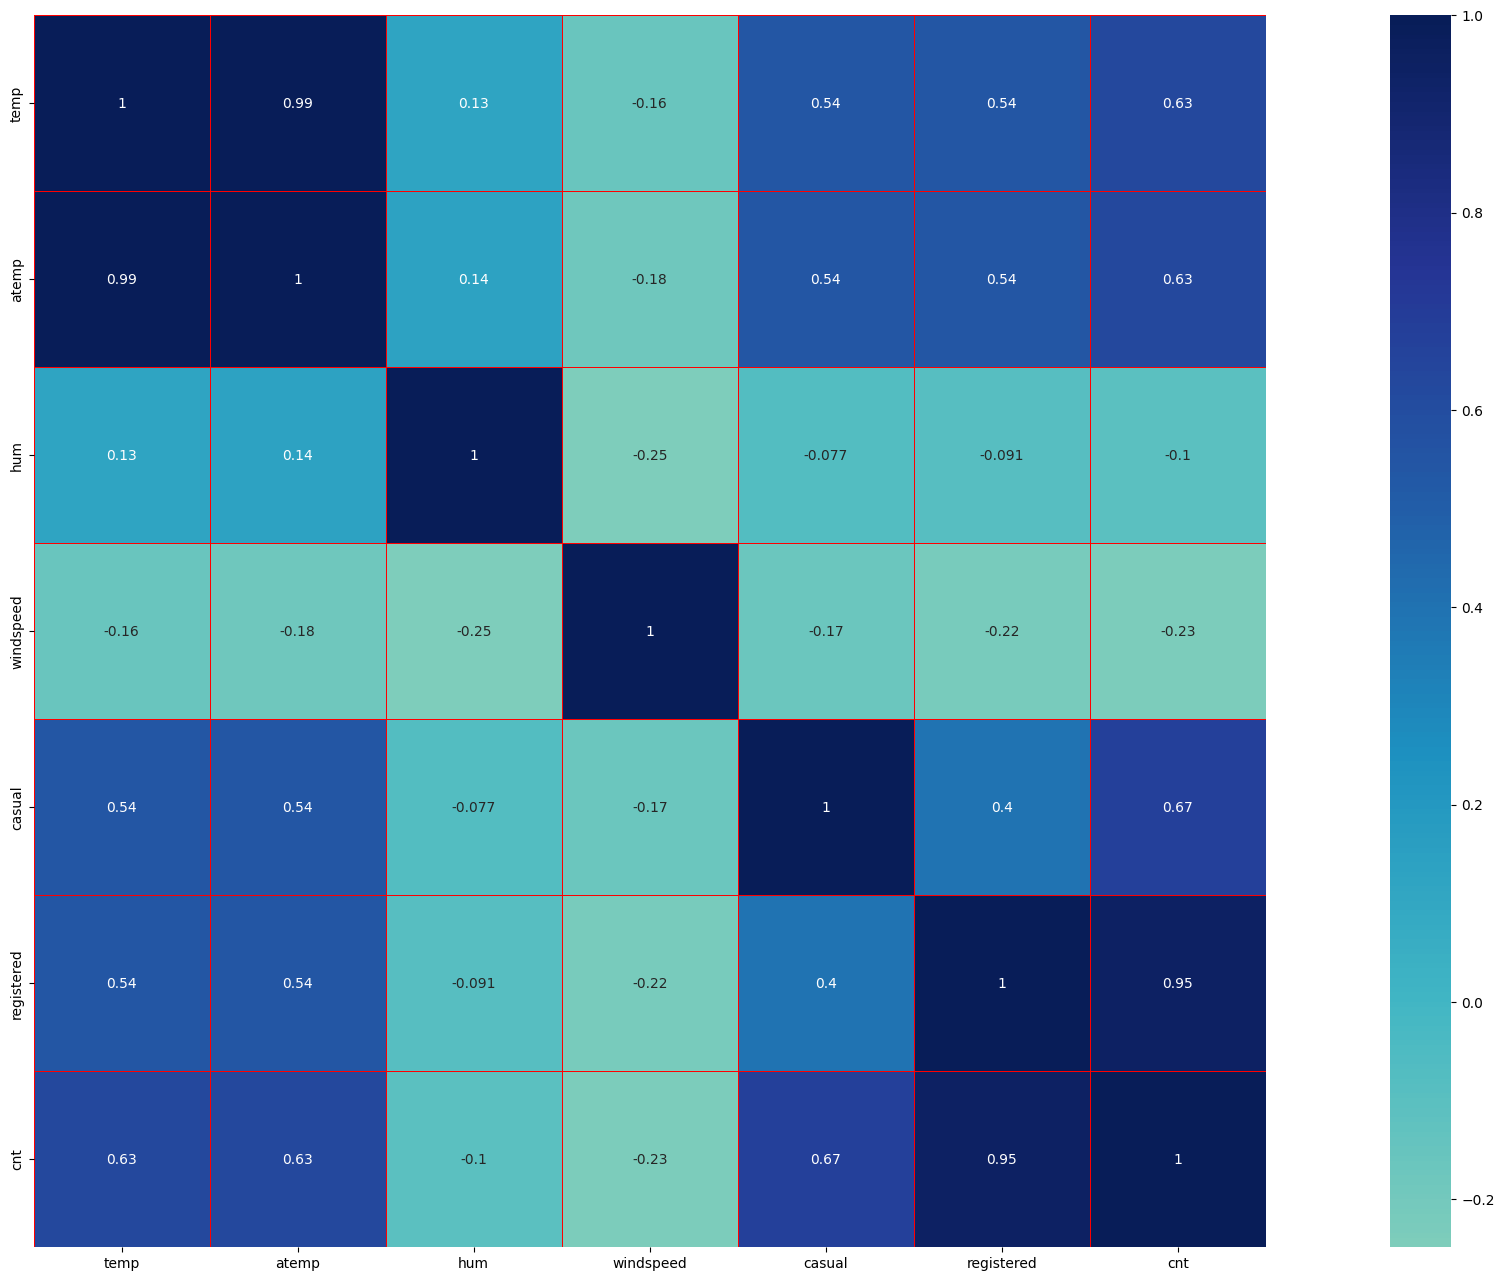

In [30]:
plt.figure(figsize=(32,16))
sns.heatmap(day_df.corr(),cmap="YlGnBu",square=True,linewidths=.5,center=0,linecolor="red", annot=True)

### Explore hour_df

In [31]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379.0,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,2.0,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,1.0,Jul,NaN,0.0,Sat,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,8734.0,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [32]:
#Kelompokkan penyewa berdasarkan bulan
hour_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                        
      max min        mean     sum
mnth                             
Apr   822   1  187.260960  269094
Aug   941   1  238.097627  351194
Dec   759   1  142.303439  211036
Feb   610   1  112.865026  151352
Jan   559   1   94.424773  134933
Jul   913   1  231.819892  344948
Jun   900   1  240.515278  346342
Mar   957   1  155.410726  228920
May   873   1  222.907258  331686
Nov   729   1  177.335421  254831
Oct   963   1  222.158511  322352
Sep   977   1  240.773138  345991

In [33]:
#Kelompokkan penyewa berdasarkan workingday
hour_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                
            max min        mean
workingday                     
0           783   1  181.405332
1           977   1  193.207754

In [34]:
#Kelompokkan penyewa berdasarkan weekday
hour_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
})

cnt                
         max min        mean
weekday                     
Fri      957   1  196.135907
Mon      968   1  183.744655
Sat      783   1  190.209793
Sun      776   1  177.468825
Thu      976   1  196.436665
Tue      970   1  191.238891
Wed      977   1  191.130505

In [35]:
#Kelompokkan penyewa berdasarkan holiday
hour_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                        
         max min       mean      sum
holiday                             
0        977   1  190.42858  3214244
1        712   1  156.87000    78435

In [36]:
#Kelompokkan penyewa berdasarkan keadaan cuaca
hour_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                         
                     max min        mean      sum
weathersit                                       
Clear/Partly Cloudy  977   1  204.869272  2338173
Light Snow/Rain      891   1  111.579281   158331
Misty/Cloudy         957   1  175.165493   795952
Severe Weather       164  23   74.333333      223

In [37]:
#Kelompokkan penyewa berdasarkan season
hour_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual  registered  cnt                
             mean        mean  max min        mean
season                                            
Fall    50.287144  185.729093  977   1  236.016237
Spring  14.290901   96.823668  801   1  111.114569
Summer  46.160581  162.183488  957   1  208.344069
Winter  30.666824  168.202032  967   1  198.868856

<Axes: >

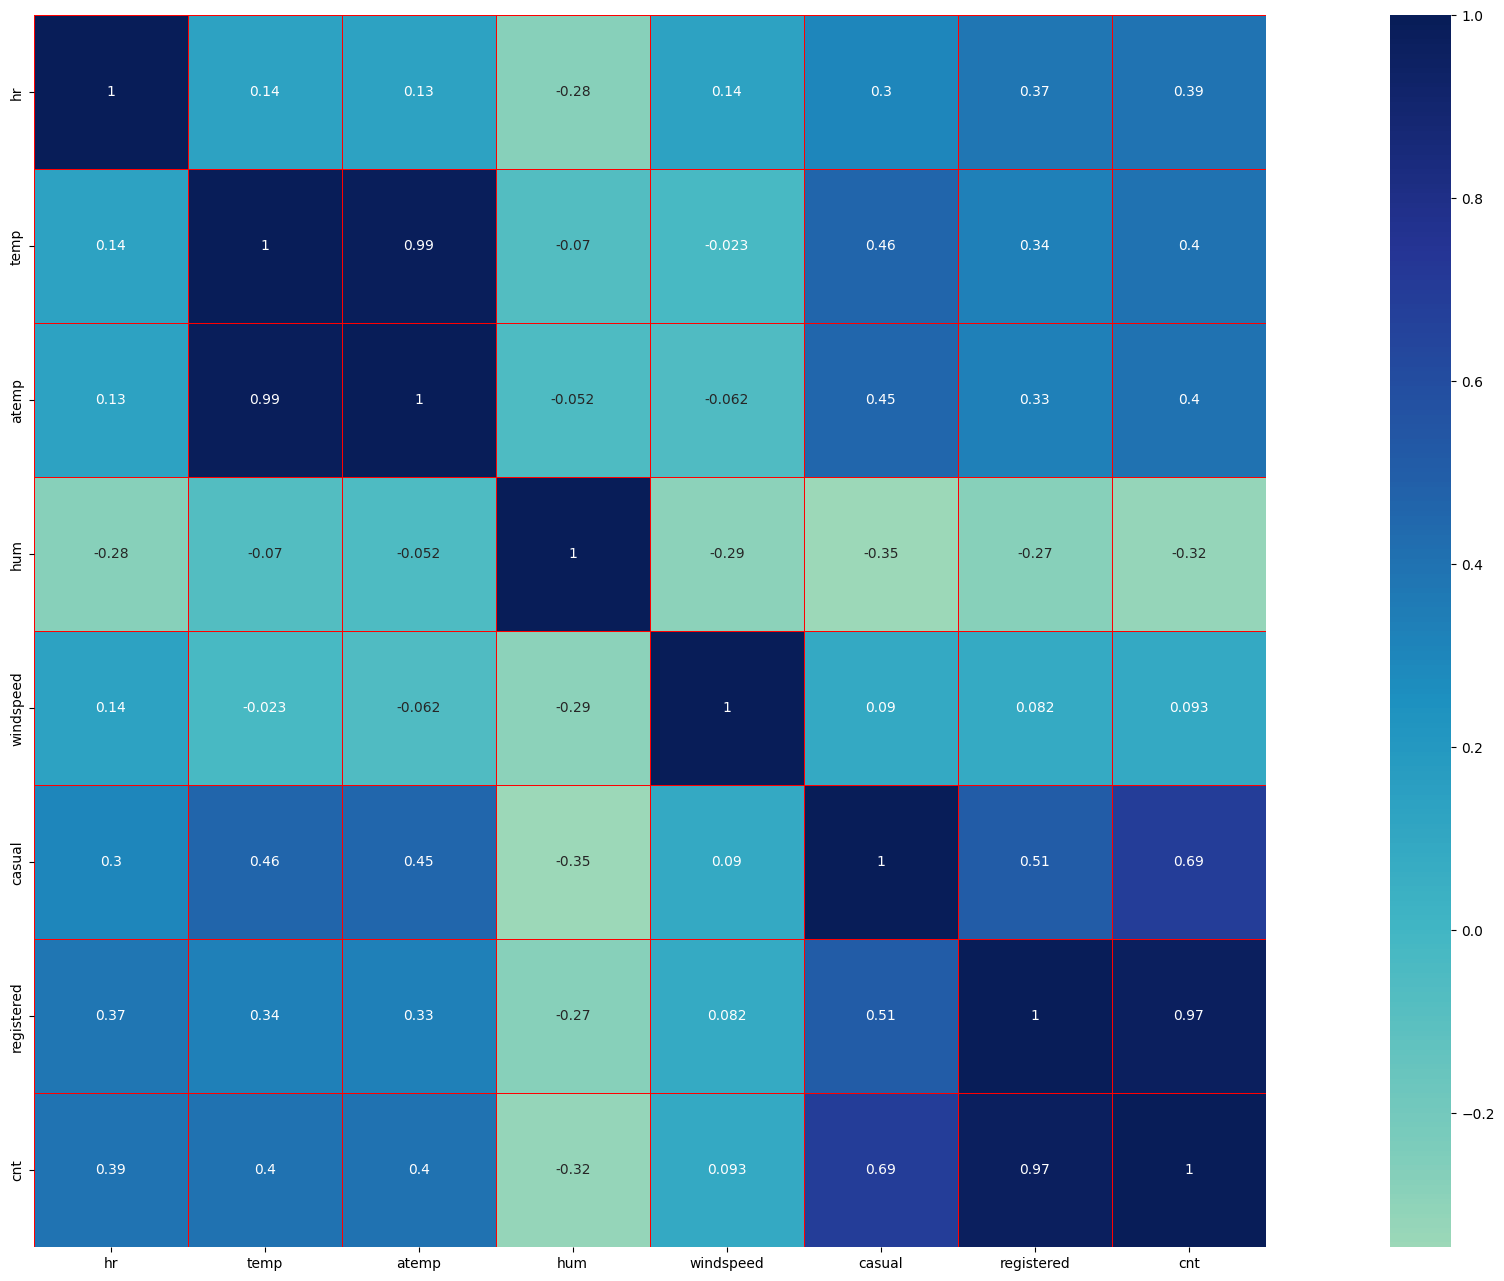

In [38]:
plt.figure(figsize=(32,16))
sns.heatmap(hour_df.corr(),cmap="YlGnBu",square=True,linewidths=.5,center=0,linecolor="red", annot=True)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda berubah sepanjang tahun?

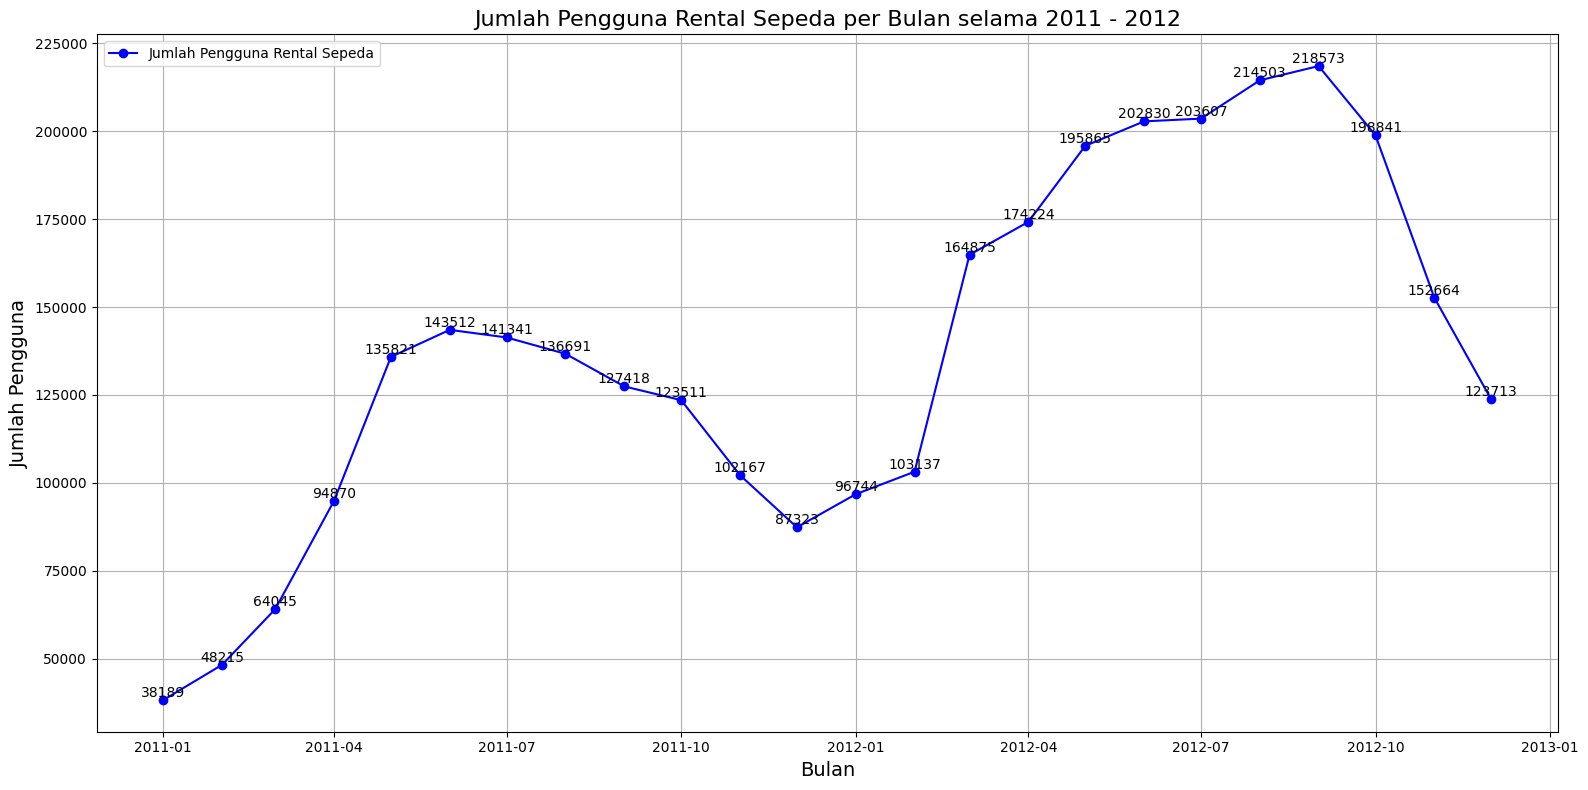

In [39]:
# Kelompokkan data berdasarkan bulan dan jumlahkan
df_by_month = day_df.groupby(day_df['dteday'].dt.to_period('M')).sum()

# Membuat subplot dengan ukuran yang telah ditentukan
fig, ax = plt.subplots(figsize=(16, 8))

# Plot garis chart
ax.plot(df_by_month.index.to_timestamp(), df_by_month['cnt'], label='Jumlah Pengguna Rental Sepeda', marker='o', color='blue', linestyle='-')

# Judul plot dan label sumbu
plt.title('Jumlah Pengguna Rental Sepeda per Bulan selama 2011 - 2012', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)

# Menambahkan teks hover untuk setiap titik
for x, y in zip(df_by_month.index.to_timestamp(), df_by_month['cnt']):
    ax.text(x, y, f'{int(y)}', ha='center', va='bottom')

# Menampilkan legenda
ax.legend()

# Menampilkan plot
plt.grid(True)
plt.tight_layout()
plt.show()


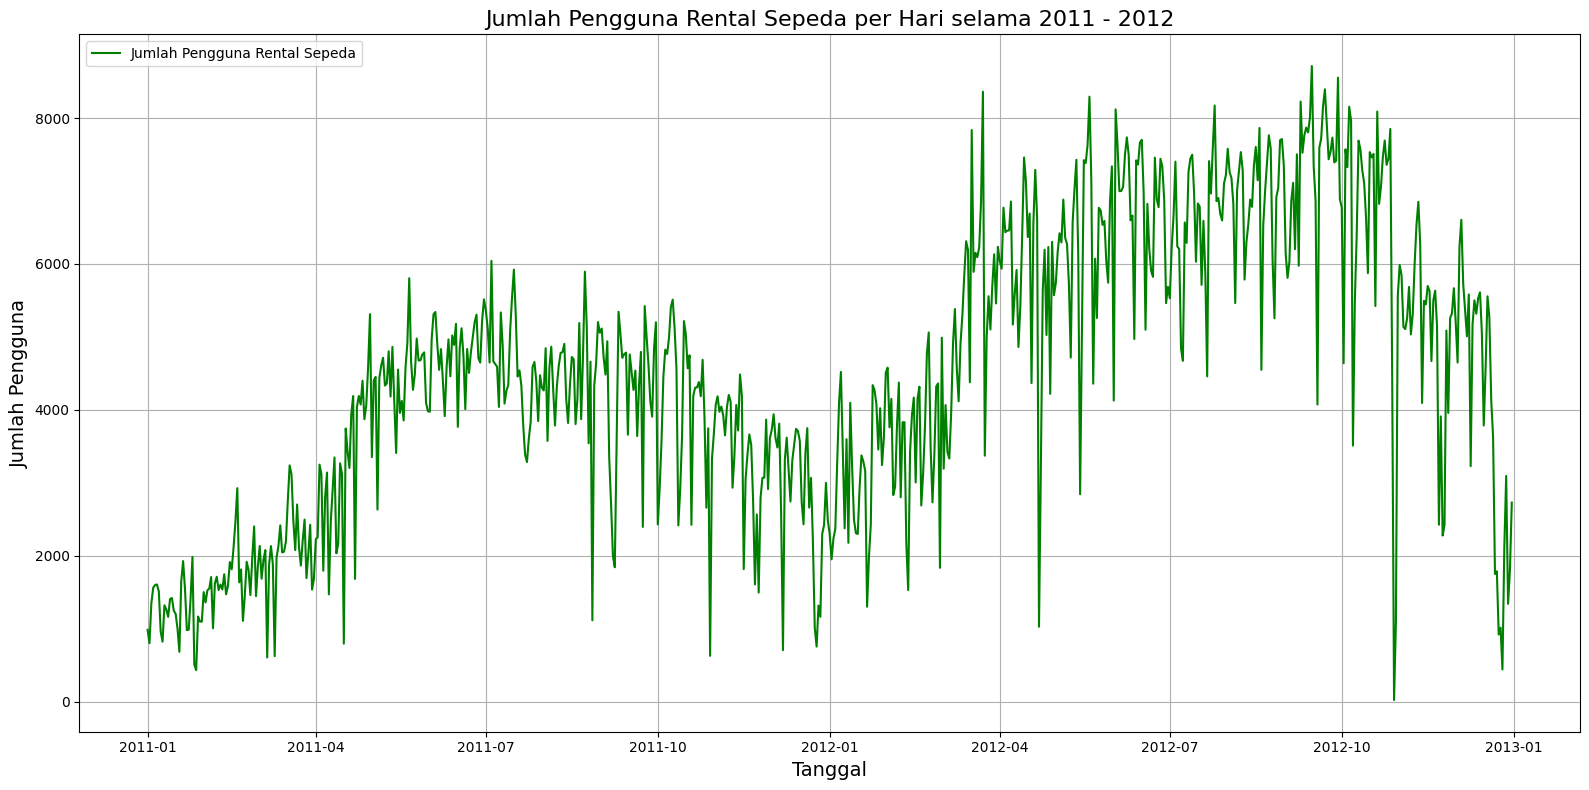

In [40]:
# Kelompokkan data berdasarkan hari dan jumlahkan
df_by_day = hour_df.groupby(hour_df['dteday']).sum()

# Membuat subplot dengan ukuran yang telah ditentukan
fig, ax = plt.subplots(figsize=(16, 8))

# Plot garis chart tanpa marker
ax.plot(df_by_day.index, df_by_day['cnt'], label='Jumlah Pengguna Rental Sepeda', color='green', linestyle='-')

# Judul plot dan label sumbu
plt.title('Jumlah Pengguna Rental Sepeda per Hari selama 2011 - 2012', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)

# Menampilkan legenda
ax.legend()

# Menampilkan plot
plt.grid(True)
plt.tight_layout()
plt.show()


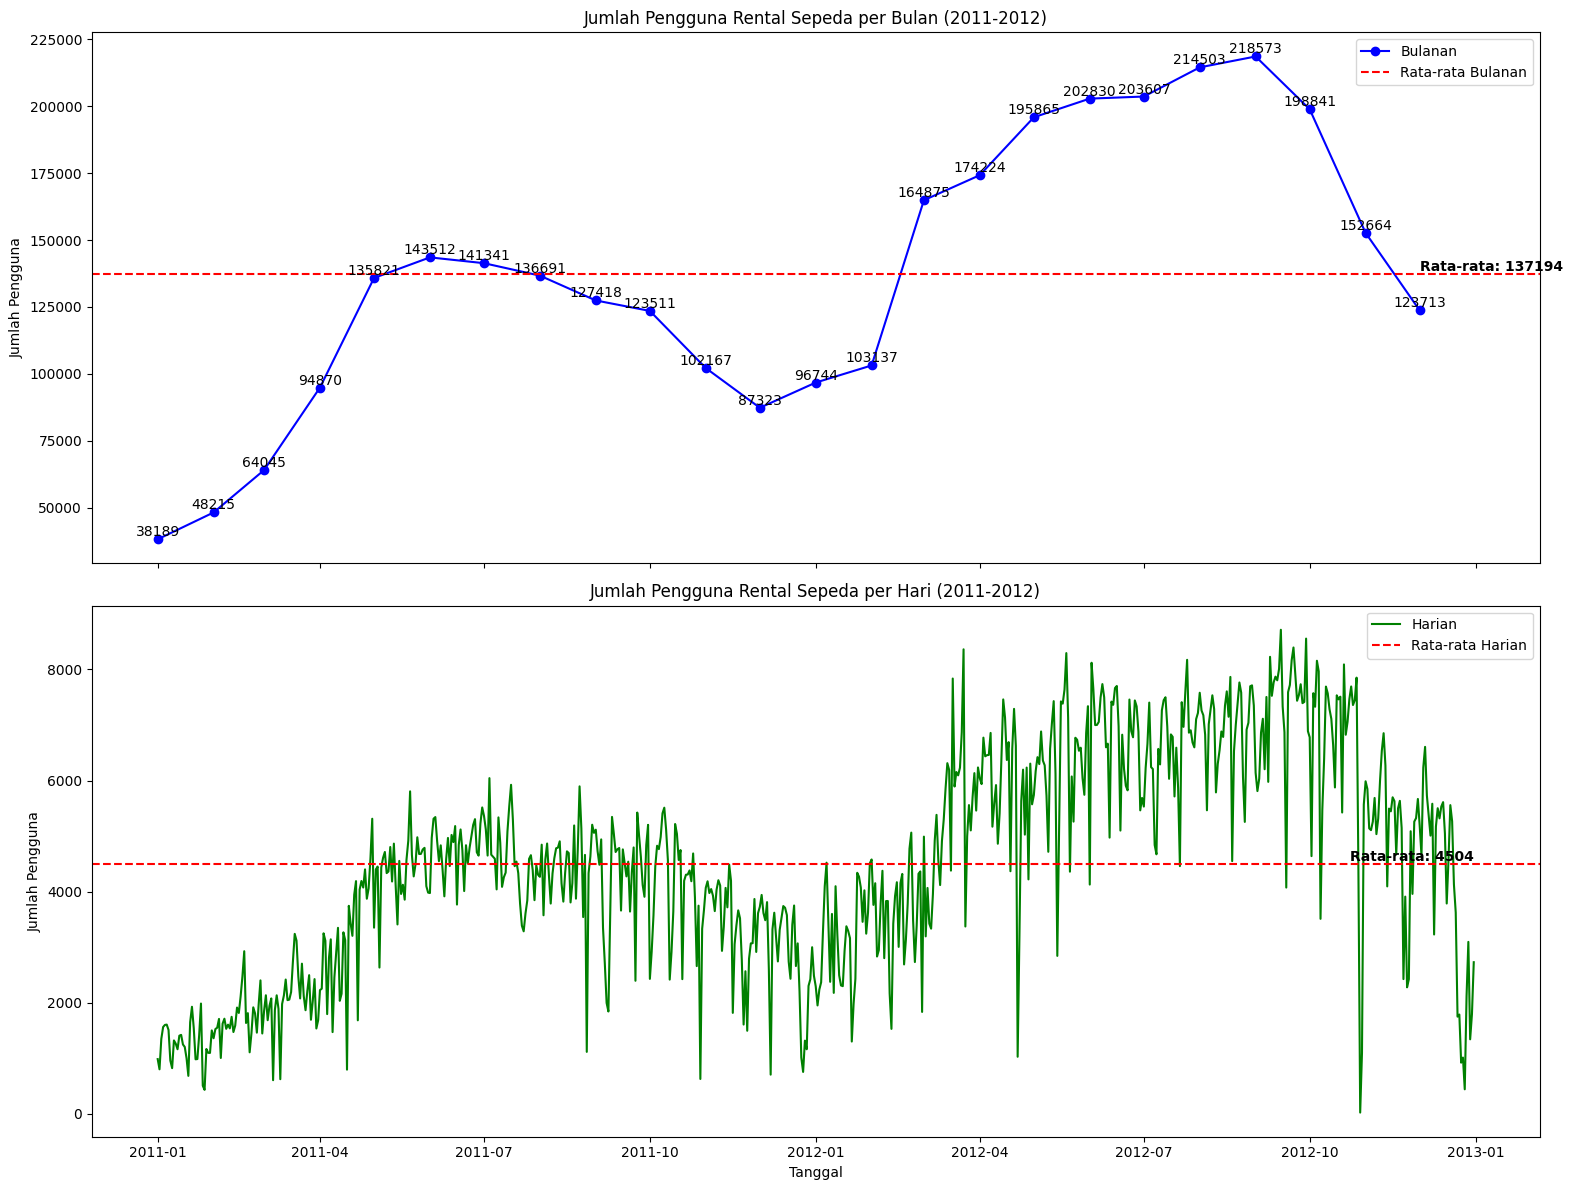

In [41]:
# Hitung rata-rata per bulan dan per hari
monthly_mean = df_by_month['cnt'].mean()
daily_mean = df_by_day['cnt'].mean()

# Membuat subplot dengan ukuran yang telah ditentukan
fig, ax = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# Plot garis chart per bulan dengan marker bulatan
ax[0].plot(df_by_month.index.to_timestamp(), df_by_month['cnt'], label='Bulanan', color='blue', linestyle='-', marker='o')
ax[0].axhline(y=monthly_mean, color='red', linestyle='--', label='Rata-rata Bulanan')

# Menambahkan keterangan angka di setiap titik data
for x, y in zip(df_by_month.index.to_timestamp(), df_by_month['cnt']):
    ax[0].text(x, y, f'{int(y)}', ha='center', va='bottom')

# Menambahkan keterangan angka di garis rata-rata bulanan
ax[0].text(df_by_month.index[-1].to_timestamp(), monthly_mean, f'Rata-rata: {int(monthly_mean)}', ha='left', va='bottom', fontweight='bold')

ax[0].set_title('Jumlah Pengguna Rental Sepeda per Bulan (2011-2012)')
ax[0].set_ylabel('Jumlah Pengguna')
ax[0].legend()

# Plot garis chart per hari
ax[1].plot(df_by_day.index, df_by_day['cnt'], label='Harian', color='green', linestyle='-')
ax[1].axhline(y=daily_mean, color='red', linestyle='--', label='Rata-rata Harian')

# Menambahkan keterangan angka di garis rata-rata harian
ax[1].text(df_by_day.index[-1], daily_mean, f'Rata-rata: {int(daily_mean)}', ha='right', va='bottom', fontweight='bold')

ax[1].set_title('Jumlah Pengguna Rental Sepeda per Hari (2011-2012)')
ax[1].set_xlabel('Tanggal')
ax[1].set_ylabel('Jumlah Pengguna')
ax[1].legend()

# Menampilkan plot
ax[1].grid(False)  # Matikan grid di subplot kedua
plt.tight_layout()
plt.show()


**Setiap subplot menampilkan data jumlah pengguna rental sepeda dalam periode tertentu, baik per bulan maupun per hari, selama tahun 2011-2013.**



*   **Subplot pertama** (di atas) menunjukkan jumlah pengguna rental sepeda per bulan. Garis biru mewakili data aktual jumlah pengguna setiap bulan, sedangkan garis putus-putus merah mewakili rata-rata jumlah pengguna per bulan selama periode yang diamati.

*   **Subplot kedua** (di bawah) menunjukkan jumlah pengguna rental sepeda per hari. Garis hijau mewakili data aktual jumlah pengguna setiap hari, sedangkan garis putus-putus merah mewakili rata-rata jumlah pengguna per hari selama periode yang diamati.

Dari grafik ini, kita dapat melihat tren penggunaan sepeda selama periode 2011-2012 baik secara bulanan maupun harian. Kita juga dapat membandingkan data aktual dengan rata-rata untuk mendapatkan pemahaman yang lebih baik tentang bagaimana jumlah penggunaan rental sepeda berkembang dari waktu ke waktu.



### Pertanyaan 2: Apa dampak cuaca terhadap penggunaan layanan penyewaan sepeda?

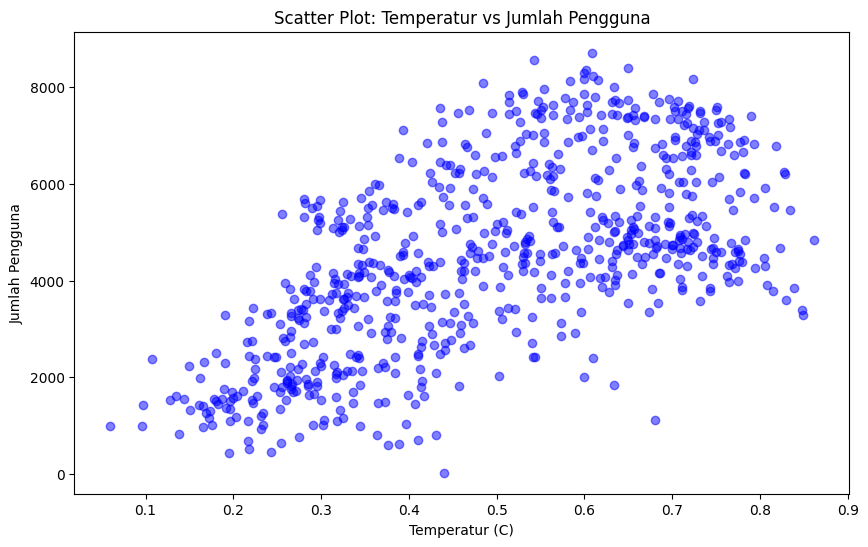

In [42]:
# Scatter plot: Temperatur vs Jumlah Pengguna
plt.figure(figsize=(10, 6))
plt.scatter(day_df['temp'], day_df['cnt'], color='blue', alpha=0.5)  # Menggunakan kolom 'temp' dan 'cnt'
plt.title('Scatter Plot: Temperatur vs Jumlah Pengguna')
plt.xlabel('Temperatur (C)')
plt.ylabel('Jumlah Pengguna')
plt.grid(False)
plt.show()

Dari grafik, kita dapat melihat bahwa sebagian besar titik berkumpul di sekitar pusat grafik, yang menunjukkan bahwa sebagian besar observasi memiliki temperatur dan jumlah pengguna yang berada di kisaran tengah. Namun, kita juga dapat melihat tren naik secara umum ketika temperatur meningkat, yang menandakan bahwa jumlah pengguna sepeda cenderung meningkat saat temperatur naik.

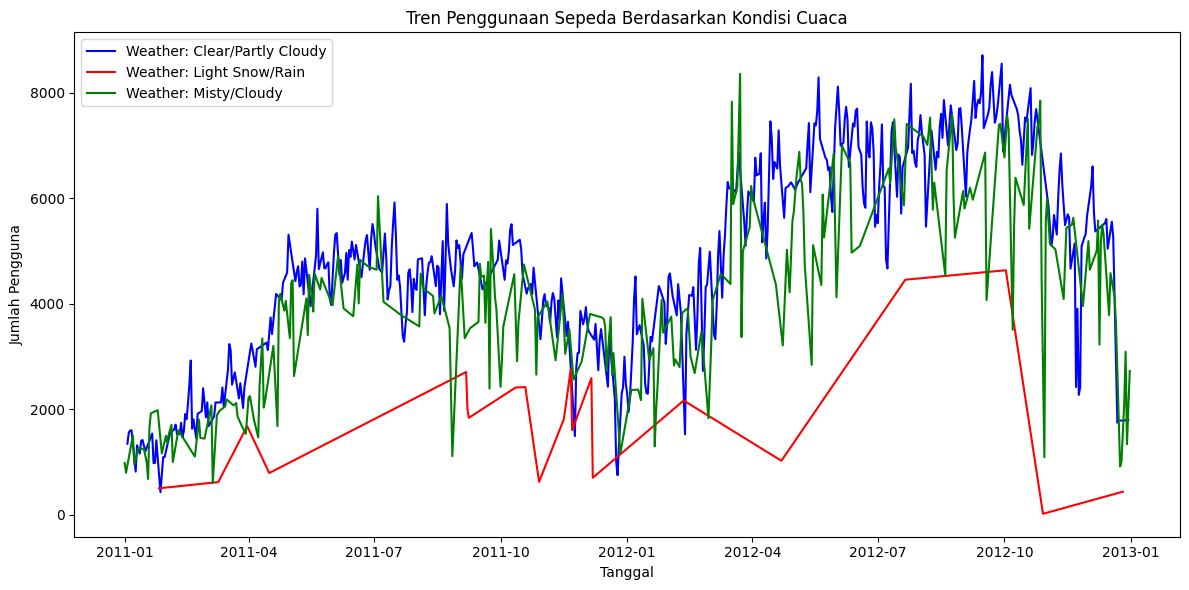

In [43]:
# Membuat line plot
plt.figure(figsize=(12, 6))

# Daftar warna yang akan digunakan
colors = ['blue', 'red', 'green']

# Memisahkan data berdasarkan kondisi cuaca
for i, (weather_situation, group_data) in enumerate(day_df.groupby('weathersit')):
    plt.plot(group_data['dteday'], group_data['cnt'], label=f"Weather: {weather_situation}", color=colors[i])

plt.title('Tren Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

Grafik line plot di atas menggambarkan tren penggunaan sepeda berdasarkan kondisi cuaca. Setiap garis mewakili satu kondisi cuaca, dengan warna yang berbeda menandakan setiap kondisi. Dari grafik tersebut, dapat dilihat bahwa:


*   Jumlah pengguna sepeda cenderung berfluktuasi tergantung pada kondisi cuaca.
*   Pada kondisi cuaca yang lebih baik, seperti cuaca cerah atau sebagian berawan (ditandai dengan garis biru dan hijau), jumlah pengguna sepeda cenderung meningkat.
*   Pada saat cuaca menjadi buruk, seperti pada kondisi hujan atau salju (ditandai dengan garis merah), jumlah pengguna sepeda cenderung menurun.

Grafik ini memberikan gambaran visual yang jelas tentang hubungan antara kondisi cuaca dan penggunaan layanan penyewaan sepeda.

## Conclusion

- Conclution pertanyaan 1

  Dari analisis data jumlah pengguna rental sepeda per bulan dan per hari selama tahun 2011-2013, dapat dilihat bahwa terdapat pola yang menarik dalam penggunaan layanan penyewaan sepeda. Grafik menunjukkan bahwa jumlah pengguna rental sepeda cenderung mengalami fluktuasi sepanjang tahun, dengan tren peningkatan tertentu pada beberapa bulan dan penurunan pada bulan-bulan lainnya. Perbandingan antara data aktual dengan rata-rata juga memberikan wawasan tambahan tentang bagaimana pola penggunaan sepeda berkembang dari waktu ke waktu. Dengan demikian, dapat disimpulkan bahwa faktor-faktor tertentu, seperti musim atau peristiwa tertentu dalam setiap bulan, mungkin memengaruhi pola penggunaan layanan penyewaan sepeda. Analisis ini dapat membantu dalam pemahaman lebih lanjut tentang kebiasaan pengguna dan potensi strategi pemasaran yang sesuai untuk meningkatkan penggunaan layanan rental sepeda.


- Conclution pertanyaan 2

  Berdasarkan analisis grafik, dapat disimpulkan bahwa cuaca memengaruhi penggunaan layanan penyewaan sepeda secara signifikan. Tren naik dalam penggunaan sepeda terjadi ketika temperatur meningkat, menunjukkan bahwa cuaca yang lebih hangat cenderung meningkatkan minat orang untuk menggunakan sepeda. Di sisi lain, saat cuaca buruk seperti hujan atau salju, terjadi penurunan dalam jumlah pengguna sepeda. Oleh karena itu, dapat dikatakan bahwa cuaca memainkan peran penting dalam memengaruhi keputusan individu untuk menggunakan layanan penyewaan sepeda. Informasi ini dapat menjadi dasar untuk pengambilan keputusan yang lebih baik dalam pengelolaan layanan dan strategi pemasaran yang tepat untuk meningkatkan penggunaan sepeda, terutama dengan memperhatikan proyeksi cuaca.

In [44]:
day_df.to_csv("day_df_clean.csv", index=False)
hour_df.to_csv("hour_df_clean.csv", index=False)